## Jack's Car Rental

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math

In [2]:
## Initialization
# Technically, there will be infinite s', but we limited it to 20.

SIZE = 20
states = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is its state value?
policy = np.zeros((SIZE+1,SIZE+1)) # Given a pair of state, what is the action to take? (Always deterministic)
theta = 0.3
gamma = 0.9

In [3]:
def gather_value(state, action, states):
    s1, s2 = state
    v_s = 0
    # Iterate through all possible request and return values
    for req1 in range(0, s1+1):
        for req2 in range(0, s2+1):
            for ret1 in range(0, 20-s1+1):
                for ret2 in range(0, 20-s2+1):
                    p = calculate_prob(req1, req2, ret1, ret2)
                    # optional: if p is too small, skip

                    # Calculate the reward
                    reward, s1_prime, s2_prime = calculate_reward(req1, req2, s1, s2, ret1, ret2, action)

                    if s1_prime > 20 or s2_prime > 20 or s1_prime < 0 or s2_prime < 0:
                        continue
                    
                    
                    v_s = v_s + p * (reward + gamma * states[int(s1_prime), int(s2_prime)])
                    # print("v_s ", v_s, reward, s1_prime, s2_prime)
    return v_s


# The probability of the request and return values
def calculate_prob(req1, req2, ret1, ret2):
    p1 = math.exp(-3) * 3**req1 / math.factorial(req1)
    p2 = math.exp(-4) * 4**req2 / math.factorial(req2)
    p3 = math.exp(-3) * 3**ret1 / math.factorial(ret1)
    p4 = math.exp(-2) * 2**ret2 / math.factorial(ret2)
    return p1 * p2 * p3 * p4

def calculate_reward(req1, req2, s1, s2, ret1, ret2, action):
    # avail are >= 0 because policy is assigned at Improvement, 
    # and feasible() filters out invalid ones.
    
    avail1, avail2 = s1-action, s2+action
    rent1, rent2 = min(req1, avail1), min(req2, avail2)
    ret = -2 * abs(action)
    rental = (rent1 + rent2) * 10

    return ret + rental, min(20, s1-rent1+ret1), min(20, s2-rent2+ret2)

In [4]:
## Evaluation
def policy_evaluation():
    break_loop = False
    while not break_loop:
        change = 0
        for i in range(SIZE+1):
            for j in range(SIZE+1):
                prev_state = states[i,j]
                val = gather_value([i,j], policy[i,j], states) 
                states[i,j] = val
                # print("State ", i, j, " with value ", val)
                change = max(change, abs(prev_state - states[i,j]))
                # print("change ", change)
        if change < theta:
            break_loop = True

In [5]:
def determine_action(state):
    max_value, max_action = 0, 0
    for action in range(-5, 6):
        if not feasible(state, action):
            continue
        value = gather_value(state, action, states)
        # print("outside determine", value)
        if value > max_value:
            max_action = action
    return max_action

def feasible(state, action):
    s1, s2 = state
    a = abs(action)
    return (
        (action > 0 and s1 >= a and s2 + a <= 20) or
        (action <= 0 and s2 >= a and s1 + a <= 20)
    )


In [6]:
## Improvement
def policy_improvement():
    policy_stable = True
    for i in range(SIZE+1):
        for j in range(SIZE+1):
            old_action = policy[i,j]
            policy[i,j] = determine_action([i,j])
            if policy[i,j] != old_action:
                policy_stable = False

    if policy_stable:
        print("Iteration complete! ", states, policy)
        return True
    return False

In [7]:
iter_count = 1
while True:
    print("Start iteration: ", iter_count)
    policy_evaluation()
    print("Finished evaluation with states", states, "and policy: ", policy)
    if policy_improvement():
        break
    iter_count += 1

Start iteration:  1
Finished evaluation with states [[8.96367360e-03 8.79247456e-02 3.40516253e-01 8.24236976e-01
  1.49450265e+00 2.24322618e+00 2.97219571e+00 3.63062028e+00
  4.20867520e+00 4.71536240e+00 5.16228976e+00 5.55712774e+00
  5.90178788e+00 6.18994078e+00 6.39956785e+00 6.47592583e+00
  6.30352066e+00 5.68936020e+00 4.43809324e+00 2.61838552e+00
  8.57594110e-01]
 [6.62272527e-02 5.05749188e-01 1.77061628e+00 4.06114269e+00
  7.12714324e+00 1.04742261e+01 1.36835179e+01 1.65551815e+01
  1.90645219e+01 2.12609002e+01 2.31988953e+01 2.49127779e+01
  2.64105088e+01 2.76636322e+01 2.85744469e+01 2.88999335e+01
  2.81257664e+01 2.53894232e+01 1.98133392e+01 1.16954839e+01
  3.83261343e+00]
 [2.00355912e-01 1.37886504e+00 4.57546919e+00 1.01661930e+01
  1.74857038e+01 2.53639886e+01 3.28566052e+01 3.95385750e+01
  4.53783344e+01 5.05002809e+01 5.50314715e+01 5.90484061e+01
  6.25659113e+01 6.55139485e+01 6.76598219e+01 6.84276656e+01
  6.65990890e+01 6.01291371e+01 4.69335434e+

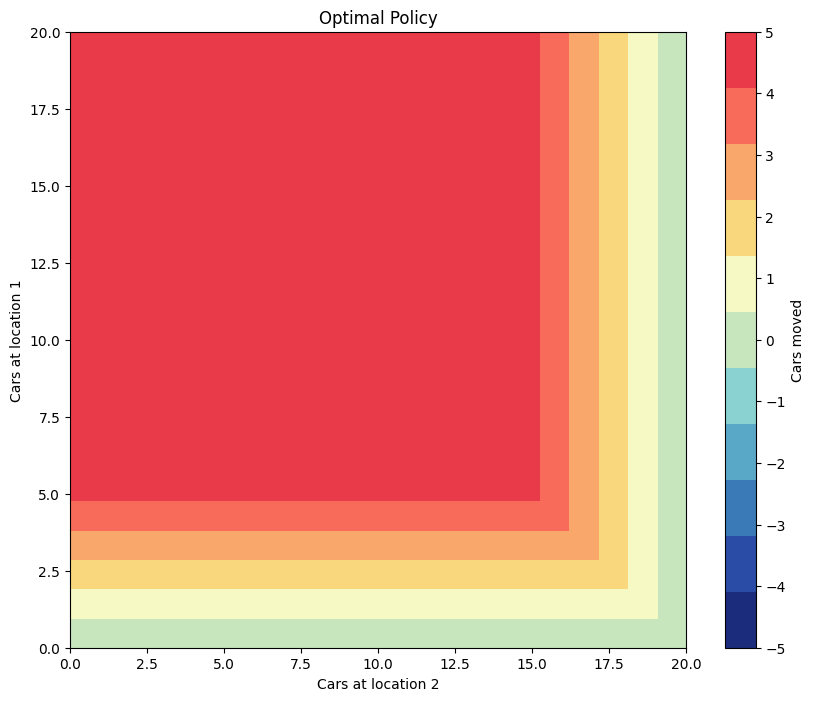

In [10]:
# Create custom colormap matching the screenshot
colors = [
    '#1a2c7b', '#2a4ca7', '#3a7bb7', '#5aa8c8', '#8ad2d1',
    '#c8e6be', '#f6f9c4', '#f9d77c', '#f9a76a', '#f86a5a', '#e93a4a'
]
cmap = ListedColormap(colors)

# Create plot
plt.figure(figsize=(10, 8))
plt.imshow(policy, cmap=cmap, vmin=-5, vmax=5, origin='lower', extent=[0, 20, 0, 20])
plt.colorbar(ticks=range(-5, 6), label='Cars moved')
plt.xlabel('Cars at location 2')
plt.ylabel('Cars at location 1')
plt.title('Optimal Policy')
plt.show()